# Projeto Integrador 4

<img src="https://www.faesa.br/hubfs/logo-faesa-branco.png" style="background-color:DarkBlue;width:250px;float:left;"/>
<br><br><br><br><br>
<table style="float:left;">
    <tr>
        <td>
            <p><strong>FAESA CENTRO UNIVERSITÁRIO</strong></p>
        </td>
        <td>
            <p></p>
        </td>
        <td>
            <p><strong>Valor:</strong>10,0 (dez) pontos</p>
        </td>
    </tr>
    <tr>
        <td>
            <p><strong>Unidade: </strong>Unidade de Computação e Sistemas</p>
        </td>
        <td>
            <p><strong>Curso: </strong>Ciência da Computação e Sistemas de Informação</p>
        </td>
        <td>
            <p></p>
        </td>
    </tr>
    <tr>
        <td>
            <p><strong>Disciplina: </strong>Projeto Integrador Computação IV</p>
        </td>
        <td>
            <p><strong>Professor: </strong>Howard Roatti</p>
        </td>
        <td>
            <p><strong>Nota:</strong>_______________</p>
        </td>
    </tr>
    <tr>
        <td>
            <p><strong>Nome dos Integrantes: Gabriel Bremenkamp, Gabriel Tozato, Vitor, Natan Campos, Israel Oliveira, </strong></p>
        </td>
</table>


# Exploração dos dados:

## Informações do dataset

## Bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Lib voltada para plot de graficos, baseada na lib matplotlib
import math

#Scikit Learn é uma lib open source de aprendizagem de maquina.
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

##  Carregando os dados

In [2]:
def ler():
    resultado = []
    arq = open("tweets.txt","r",encoding="utf8")
    linhas = arq.readlines()
    for linha in linhas:
        resultado.append(linha+'\t')
    return resultado

In [3]:
#Carregando os tweets e convertendo eles para DataFrame
txt = ler()
df = pd.DataFrame(txt, columns = ['tweets'])
df = df.drop_duplicates()

## Exploração de dados

In [4]:
#Exibindo o 10 primeiros valores da tabela.
df.head(10)

,tweets
0,"Eleições 2022: PDT anuncia apoio a Lula, e Cir..."
1,eleições 2022 ou modern family?\n\t
2,O PDT anunciou apoio a Lula no segundo turno ...
3,Simone Tebet pretende encontrar Lula pessoalm...
4,A interpretação é de cada um. Eleições 2022\n\t
5,Grupo Jovem Pan bate recorde de audiência nas ...
6,URGENTE: PDT ACABA DE ANUNCIAR APOIO AO LULA ...
7,Estes foram os desempenhos do NOVO nas eleiçõe...
8,Tem gente que já votou no 2⁰ turno das eleiçõe...
9,"Em pleno Outubro Rosa, Governo Bolsonaro acab..."


In [5]:
#checando as informações das colunas
df.describe()

,tweets
count,1000
unique,1000
top,"Eleições 2022: PDT anuncia apoio a Lula, e Cir..."
freq,1


In [6]:
#checa a existência de valores nulos
df.isnull().values.any()

False

# Classificação dos dados

In [7]:
#Transformando o dataframe em unidimensional para aplicar o vectorizer.

x = np.array(df)
vectorizer = CountVectorizer()
flat_x = x.flatten()
xVet = vectorizer.fit_transform(flat_x)

In [8]:
#Imprimindo todos os termos encontrados no Dataframe.

vectorizer.get_feature_names()

C:\Users\gabriel.sebastiao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '00hs',
 '02',
 '03',
 '04',
 '07',
 '072',
 '09',
 '0deiam',
 '10',
 '100',
 '1000',
 '11',
 '12',
 '123',
 '124382',
 '129',
 '13',
 '13h',
 '13hs',
 '13º',
 '14',
 '14h',
 '14k',
 '15',
 '1577075215267291140',
 '159',
 '15h',
 '16',
 '160',
 '163',
 '164',
 '18',
 '187',
 '19',
 '19992238102',
 '1djxxlbmvpkxz',
 '1o',
 '1turno',
 '1v55v5e',
 '1v6s9wm',
 '1ª',
 '1º',
 '20',
 '200',
 '20011349331',
 '2003',
 '2014',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2022boca',
 '2022expectativa',
 '2022institutos',
 '2022participar',
 '2023',
 '2026',
 '2028',
 '2034',
 '21',
 '219',
 '22',
 '222',
 '22meu',
 '22por',
 '23',
 '24',
 '240',
 '242',
 '246',
 '24hnews',
 '25',
 '259',
 '26',
 '262038',
 '275831',
 '28',
 '28911',
 '29',
 '293',
 '2996a2f70544aa6e54cc4d59f6c0ff69v7drljhv',
 '2cgmmff',
 '2mxvyit',
 '2o',
 '2oturno',
 '2turno',
 '2º',
 '2⁰',
 '30',
 '30bi',
 '31',
 '32',
 '33',
 '330',
 '345',
 '353',
 '36',
 '367',
 '369',
 '39',
 '3c87oks',
 '3cv9zqv',
 '3cxg

In [9]:
#Criando um dataframe e ordenando, utilizando as quantidades e os termos como colunas para poder fazer o plot
#Deixei os 10 termos que mais se repetem.

d = vectorizer.vocabulary_
d2 = pd.DataFrame(d.items(), columns=['Termo', 'Quantidade'])
df2 = d2.sort_values(by='Quantidade', ascending=False)
df2 = df2[df2.Quantidade < 4581]
df2
dfPonderacao = pd.DataFrame(df2['Termo'])

In [10]:
#DATAFRAME COM OS TERMOS COMO COLUNAS PARA NO FINAL GERAR OS CSV'S DAS PONDERAÇÕES.
dfPonderacao = dfPonderacao.set_index('Termo')
dfPonderacao = dfPonderacao.T
dfPonderacao

Termo,útil,única,últimos,último,últimasnotícias,últimas,última,önemli,ônibus,ótimo,...,10,0deiam,09,072,07,04,03,02,00hs,00


In [11]:
#Inicializando a variavel com o Kmeans e treinando o modelo.

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(xVet)

KMeans(n_clusters=3, random_state=0)

In [12]:
#Imprimindo o resultado

kmeans.labels_

array([0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1,

In [13]:
#Incluindo uma nova coluna no dataframe com o nome "Classification" que indica a que grupo pertence cada tweet, 0 1 ou 2

df['Classification'] = kmeans.labels_
df.head(10)

,tweets,Classification
0,"Eleições 2022: PDT anuncia apoio a Lula, e Cir...",0
1,eleições 2022 ou modern family?\n\t,2
2,O PDT anunciou apoio a Lula no segundo turno ...,0
3,Simone Tebet pretende encontrar Lula pessoalm...,0
4,A interpretação é de cada um. Eleições 2022\n\t,2
5,Grupo Jovem Pan bate recorde de audiência nas ...,1
6,URGENTE: PDT ACABA DE ANUNCIAR APOIO AO LULA ...,0
7,Estes foram os desempenhos do NOVO nas eleiçõe...,1
8,Tem gente que já votou no 2⁰ turno das eleiçõe...,0
9,"Em pleno Outubro Rosa, Governo Bolsonaro acab...",1


In [14]:
#Printando a quantidade de tweets que estão em cada grupo.

print(len(df.loc[df['Classification'] == 0]))
print(len(df.loc[df['Classification'] == 1]))
print(len(df.loc[df['Classification'] == 2]))

137
236
627


In [15]:
#Daqui em diante eu vou plotar graficos correspondentes e termos que mais se repetem em cada grupo.

df0 = df.loc[df['Classification'] == 0]
df1 = df.loc[df['Classification'] == 1]
df2 = df.loc[df['Classification'] == 2]

df0 = df0.drop(columns=['Classification'])
df1 = df1.drop(columns=['Classification'])
df2 = df2.drop(columns=['Classification'])

x0 = np.array(df0)
x1 = np.array(df1)
x2 = np.array(df2)

In [16]:
#Grupo 1 - Nesse grupo se destacam os termos "Vitória" "Vencedor" "Vencer" portanto o classifiquei como Positivo

vectorizer = CountVectorizer()
flat_x0 = x0.flatten()
x0Vet = vectorizer.fit_transform(flat_x0)

d0 = vectorizer.vocabulary_
d02 = pd.DataFrame(d0.items(), columns=['Termo', 'Quantidade'])
df0 = d02.sort_values(by='Quantidade', ascending=False).head(50)

print(df0)

                Termo  Quantidade
386   últimasnotícias         766
367            ônibus         765
141                às         764
387               zpr         763
60               zema         762
433              www1         761
614        vídeohttps         760
469             vídeo         759
202                vê         758
574               vão         757
47              votou         756
384  votostotalizados         755
300             votos         754
161              voto         753
577             votei         752
85               vote         751
305            votará         750
545           votarei         749
338             votar         748
487            voltar         747
548              você         746
616              vivo         745
52            vitória         744
452             virar         743
271           viradas         742
652             video         741
351           viajará         740
170               via         739
127           

In [17]:
#Grupo 2 - Nesse grupo a pesar de ter um alto numero de termos negativos ele ainda tem uma quantidade menor do que no segundo
#grupo, portanto o classifiquei como neutro, pois não tem mais positivos que o primeiro e nem tem mais negativos do que o segundo.

vectorizer = CountVectorizer()
flat_x1 = x1.flatten()
x1Vet = vectorizer.fit_transform(flat_x1)

d1 = vectorizer.vocabulary_
d12 = pd.DataFrame(d1.items(), columns=['Termo', 'Quantidade'])
df1 = d12.sort_values(by='Quantidade', ascending=False).head(50)

print(df1)

            Termo  Quantidade
425          útil        2374
131         única        2373
2067      últimos        2372
788        último        2371
1355       ônibus        2370
732          ódio        2369
254         óbvio        2368
191        ídolos        2367
1427        ícone        2366
564         ético        2365
1999        época        2364
1101       église        2363
242            às        2362
1937       zombar        2361
1593        ziywa        2360
2354         zero        2359
1541        zerar        2358
1227         zema        2357
402      zambelli        2356
337       youtube        2355
333         youtu        2354
1073       xandao        2353
1185         www1        2352
1383      wv563oj        2351
2292  whindersson        2350
1092         what        2349
2098      vítimas        2348
1466       vídeos        2347
92          vídeo        2346
511            vê        2345
98            vão        2344
684        vários        2343
1347      

In [18]:
#Grupo 3 esse é o grupo ocm maior classificação, tem os maiores termos sendo negativos, "Odio" "Zombam" "Zombavam"

vectorizer = CountVectorizer()
flat_x2 = x2.flatten()
x2Vet = vectorizer.fit_transform(flat_x2)

d2 = vectorizer.vocabulary_
d22 = pd.DataFrame(d2.items(), columns=['Termo', 'Quantidade'])
df2 = d22.sort_values(by='Quantidade', ascending=False).head(50)
df2 = df2[df2.Quantidade < 2939]

print(df2)

          Termo  Quantidade
803        útil        2938
1664      única        2937
2714    últimos        2936
1862     último        2935
1012    últimas        2934
804      última        2933
1275     önemli        2932
749       ótimo        2931
574        ódio        2930
824       óbvio        2929
1704     ênfase        2928
1418      época        2927
96           às        2926
1811         zé        2925
2894       zu7c        2924
1454        zpr        2923
1229      zonas        2922
2053   zombavam        2921
2179     zombam        2920
1991  zmffhucqw        2919
971      zeycağ        2918
2254       zero        2917


In [19]:
#Depois de identificado eu renomeei os grupos.

df['Classification'] = df['Classification'].replace(0,'Positivo')
df['Classification'] = df['Classification'].replace(1,'Neutro')
df['Classification'] = df['Classification'].replace(2,'Negativo')
df

,tweets,Classification
0,"Eleições 2022: PDT anuncia apoio a Lula, e Cir...",Positivo
1,eleições 2022 ou modern family?\n\t,Negativo
2,O PDT anunciou apoio a Lula no segundo turno ...,Positivo
3,Simone Tebet pretende encontrar Lula pessoalm...,Positivo
4,A interpretação é de cada um. Eleições 2022\n\t,Negativo
...,...,...
995,Tinha um mínimo de respeito pelo Zema. Perdi a...,Neutro
996,A apuração dos votos do primeiro turno das ele...,Neutro
997,PATRIOTAS TEREI QUE ANULAR #BOLSONARO #Eleicoe...,Negativo
998,Bolsonaro na maçonaria: vídeo antigo viraliza ...,Negativo


C:\Users\gabriel.sebastiao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


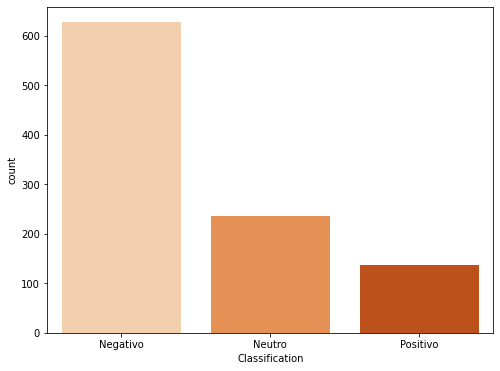

In [20]:
#Plot das quantidades para cada grupo

plt.figure(figsize=(8,6))
sns.countplot('Classification',data=df, palette = "Oranges", order = df['Classification'].value_counts().index)
plt.show()

In [21]:
#Salvando o csv com a coluna de classificação
df.to_csv('classification.csv', sep = ';', index = False, encoding = 'utf-8-sig')

# Ponderações

In [22]:
#Transformando o dataframe em unidimensional para aplicar o vectorizer.

flat_x = x.flatten()
print(flat_x)
xVet = vectorizer.fit_transform(flat_x)

#Imprimindo todos os termos encontrados no Dataframe.

termos = vectorizer.get_feature_names_out()

kmeans.fit(xVet)

df['Classification'] = kmeans.labels_

vectorizer = CountVectorizer()

x_0 = np.array(df['tweets'].loc[df['Classification'] == 0])
x_1 = np.array(df['tweets'].loc[df['Classification'] == 1])
x_2 = np.array(df['tweets'].loc[df['Classification'] == 2])

quant_termos = pd.DataFrame(termos, columns=['Termo'])
quant_termos['Quantidade'] = 0

['Eleições 2022: PDT anuncia apoio a Lula, e Ciro deve seguir orientação do partido\n\t'
 'eleições 2022 ou modern family?\n\t'
 ' O PDT anunciou apoio a Lula no segundo turno das eleições e disse que Ciro Gomes concorda com a decisão. #Eleicoes2022\n\t'
 ' Simone Tebet pretende encontrar Lula pessoalmente para debater sobre apoio no 2 turno e englobar algumas de suas propostas de governo no plano do petista! #Eleicoes2022\n\t'
 'A interpretação é de cada um. Eleições 2022\n\t'
 'Grupo Jovem Pan bate recorde de audiência nas transmissões na cobertura das eleições de 2022\n\t'
 ' URGENTE: PDT ACABA DE ANUNCIAR APOIO AO LULA NO SEGUNDO TURNO DAS ELEIÇÕES 2022.\n\t'
 'Estes foram os desempenhos do NOVO nas eleições de 2018, presidido por Moisés Jardim, e nas eleições de 2022, presidido por Eduardo Ribeiro.Com estes resultados, os candidatos do partido não terão participação garantida nos debates eleitorais até, pelo menos, 2028.\n\t'
 'Tem gente que já votou no 2⁰ turno das eleições de 20

In [23]:
#metodo que realiza a quantidade de termos por classe
def contar_termos(termos, classe):
  quant_termos = pd.DataFrame(termos, columns=['Termo'])
  quant_termos['Quantidade'] = 0

  quant_termo = 0
  for termo in termos:
    for documento in classe:
      if termo in documento:
        quant_termo+=1
    quant_termos.loc[quant_termos['Termo']==termo, 'Quantidade'] = quant_termo
  return quant_termos

In [24]:
#calcular ICF
def icfCalc(termo, classe0,classe1,classe2):
    Ci = 0
    result = 0
    C = 3
    if termo in classe0:
        Ci += 1
    if termo in classe1:
        Ci += 1
    if termo in classe2:
        Ci += 1
    if Ci == 0:
        result = 0
    else:
        result = math.log(1+(C/Ci))
    return result

In [25]:
#a = quantidade de documentos que possuem o termo na classe
#b = quantidade de documentos que possuem o termo fora da classe
#função: log(2 + a / max(1,b))
def relevance_freq(a, b):
  return math.log(2 + (a / (max(1,b))))

In [26]:
classe_0 = contar_termos(termos, x_0)
classe_1 = contar_termos(termos, x_1)
classe_2 = contar_termos(termos, x_2)

In [27]:
relevancy_frequency = pd.DataFrame(termos, columns=['Termo'])
relevancy_frequency['Classe_0'] = 0
relevancy_frequency['Classe_1'] = 0
relevancy_frequency['Classe_2'] = 0

In [34]:
dfIcf = pd.DataFrame(termos, columns=['Termo'])

In [29]:
def rf_por_termo(df, classe_0, classe_1, classe_2):
    
  classes = [classe_0, classe_1, classe_2]
  i = 0
  
  for classe in classes:
    classe_rf = 'Classe_' + str(i)

    classe_pertence = classes[0]
    classe_nao_pertence_1 = classes[1]
    classe_nao_pertence_2 = classes[2]

    for termo in df['Termo']:
      pertence = int(classe_pertence.loc[quant_termos['Termo']==termo, 'Quantidade'])
      nao_pertence = int(classe_nao_pertence_1.loc[quant_termos['Termo']==termo, 'Quantidade'])
      nao_pertence += int(classe_nao_pertence_2.loc[quant_termos['Termo']==termo, 'Quantidade'])

      rf = relevance_freq(pertence, nao_pertence)

      relevancy_frequency.loc[relevancy_frequency['Termo']==termo, classe_rf] = rf
    
    classe_atual = classes[0]
    classe_proxima = classes[1]
    classe_ultima = classes[2]
    classes[0] = classe_proxima
    classes[1] = classe_ultima
    classes[2] = classe_atual
    i += 1
    print(classe_rf)

In [41]:
def icfPorTermo(termos, classe_0, classe_1, classe_2,df):
    result = []
    vlr = 0
    
    
    
    for termo in termos:
        vlr = icfCalc(termo, classe_0,classe_1,classe_2)
        result.append(vlr)
        
    result = np.array(result)
    df['Classe_0'] = result
    df['Classe_1'] = result
    df['Classe_2'] = result
    
    return df

In [31]:
#TRANSFORMANDO O DATAFRAME EM UMA MATRIZ DE TERMOS
def matrixTweet(df0):
    x = np.array(df0['tweets'])
    result = []
    for i in x:
        i2 = i.replace(',','')
        i2 = i.replace('.','')
        i2 = i.replace(':','')
        i2 = i.replace('\n','')
        i2 = i.replace('\t','')
        i2 = i.replace('  ',' ')
        i2 = i.split()
        result.append(i2)
    return result

In [32]:
rf_por_termo(relevancy_frequency, classe_0, classe_1, classe_2)

Classe_0
Classe_1
Classe_2


In [42]:
class0 = np.array(d02['Termo'])
class1 = np.array(d12['Termo'])
class2 = np.array(d22['Termo'])

icf = icfPorTermo(dfIcf['Termo'],class0,class1,class2,dfIcf)

In [44]:
#SEPARANDO AS MATRIZES POR GRUPO "CLASSIFICATION"
df0 = df.loc[df['Classification'] == 0]
df0 = matrixTweet(df0)
df1 = df.loc[df['Classification'] == 1]
df1 = matrixTweet(df1)
df2 = df.loc[df['Classification'] == 2]
df2 = matrixTweet(df2)
print(len(df0))
print(len(df1))
print(len(df2))
print(len(dfPonderacao))
print(len(relevancy_frequency))

137
236
627
0
4609


In [45]:
#GERA UM DATAFRAME NOVO USANDO O RESULTADO DO RELEVANCY FREQUENCI AGRUPANDO POR TWEET E USANDO OS TERMOS
#COMO COLUNAS

def vetorizer(dataframe,dataframePonderacao,relevancy_frequency,classe,classe2):
    dfResult = dataframePonderacao
    linhas = []
    header = []
    i=0
    for x in dataframe:
        linha = []
        for column in dfResult:
            if column in x:
                linha.append(float(relevancy_frequency[classe2].loc[relevancy_frequency['Termo'] == column]))
            else:
                linha.append(0)
        linhas.append(linha)
    df = pd.DataFrame(linhas,
                  columns = dfResult.columns.values.tolist())
    return df

In [55]:
dfRF = relevancy_frequency[['Classe_0','Classe_1','Classe_2']]
dfICF = dfIcf[['Classe_0','Classe_1','Classe_2']]
icfBased = dfICF.mul(dfRF, fill_value = 0)
icfBased['Termo'] = dfIcf['Termo']
print(icfBased)

      Classe_0  Classe_1  Classe_2  Termo
0     1.106967  1.251640  1.523000     00
1     1.099651  1.288610  1.483947   00hs
2     1.076870  1.147805  1.807745     02
3     0.712603  0.759323  1.190521     03
4     0.713328  0.759812  1.187023     04
...        ...       ...       ...    ...
4604  1.073021  1.281080  1.549151    منه
4605  1.073018  1.281070  1.549171  وأعلن
4606  1.073016  1.281061  1.549191   ودعم
4607  1.073013  1.281052  1.549210  ونذكر
4608  1.073010  1.281043  1.549230    وها

[4609 rows x 4 columns]


In [56]:
dfPonderacaoRF0 = vetorizer(df0,dfPonderacao,relevancy_frequency,'Positivo','Classe_0')
dfPonderacaoRF1 = vetorizer(df1,dfPonderacao,relevancy_frequency,'Neutro','Classe_1')
dfPonderacaoRF2 = vetorizer(df2,dfPonderacao,relevancy_frequency,'Negativo','Classe_2')
dfPonderacaoICF0 = vetorizer(df0,dfPonderacao,dfIcf,'Positivo','Classe_0')
dfPonderacaoICF1 = vetorizer(df1,dfPonderacao,dfIcf,'Neutro','Classe_1')
dfPonderacaoICF2 = vetorizer(df2,dfPonderacao,dfIcf,'Negativo','Classe_2')
dfPonderacaoICFBASED0 = vetorizer(df0,dfPonderacao,icfBased,'Positivo','Classe_0')
dfPonderacaoICFBASED1 = vetorizer(df1,dfPonderacao,icfBased,'Neutro','Classe_1')
dfPonderacaoICFBASED2 = vetorizer(df2,dfPonderacao,icfBased,'Negativo','Classe_2')


In [57]:
dfPonderacaoRF0['Classification'] = 'Positivo'
dfPonderacaoRF1['Classification'] = 'Neutro'
dfPonderacaoRF2['Classification'] = 'Negativo'
dfPonderacaoICF0['Classification'] = 'Positivo'
dfPonderacaoICF1['Classification'] = 'Neutro'
dfPonderacaoICF2['Classification'] = 'Negativo'
dfPonderacaoICFBASED0['Classification'] = 'Positivo'
dfPonderacaoICFBASED1['Classification'] = 'Neutro'
dfPonderacaoICFBASED2['Classification'] = 'Negativo'

In [58]:
#JUNTANDO TODOS OS DATAFRAMES
df_union_allRF = pd.concat([dfPonderacaoRF0, dfPonderacaoRF1,dfPonderacaoRF2])
df_union_allICF = pd.concat([dfPonderacaoICF0, dfPonderacaoICF1,dfPonderacaoICF2])
df_union_allICFBASED = pd.concat([dfPonderacaoICFBASED0, dfPonderacaoICFBASED1,dfPonderacaoICFBASED2])

In [60]:
df_union_allRF.to_csv('relevancy.csv', sep = ';', index = False, encoding = 'utf-8-sig')
df_union_allICF.to_csv('ICF.csv', sep = ';', index = False, encoding = 'utf-8-sig')
df_union_allICFBASED.to_csv('ICFBASED.csv', sep = ';', index = False, encoding = 'utf-8-sig')